<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/7_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
path = '/content/'
df_1 = pd.read_excel(path+'kmeans_data.xlsx')
x = np.array(df_1.values)
print(x[:,0])

[ 1.84207953  5.65858312  6.35257892  2.90401653  3.23197916  1.24792268
  1.97619886  2.23454135  2.98340757  2.97970391  2.11496411  2.12169543
  1.5143529   2.16979227  0.41852373  2.47053695  4.06069132  3.00708934
  0.66632346  3.1621865   0.51155258  3.1342801   2.04974595  0.66582785
  1.01732013  2.17893568  2.85962615  1.30882588  0.99253246  1.40372638
  2.66046572  2.79995882  2.06995345  3.29765181  1.8929766   2.55983064
  1.15354031  2.25150754  2.20960296  1.59141937  1.67838038  2.59148642
  2.80996442  0.95311627  1.51775276  3.23114248  2.54180011  3.81422865
  1.68495829  2.17777173  1.8173328   1.85776553  3.03084301  2.92658295
  3.43493543  3.20367116  0.10511804  1.40597916  2.24185052  1.36678395
  1.70725482  1.91909566  1.60156731  0.37963437  2.02134502  1.12036737
  2.26901428 -0.24512713  2.12857843  1.84419981  2.32558253  1.52334113
  1.02285128  1.85382737  2.20321658  1.20099981  1.02062703  1.60493227
  0.47647355  0.3639172   0.31319845  2.28664839  2

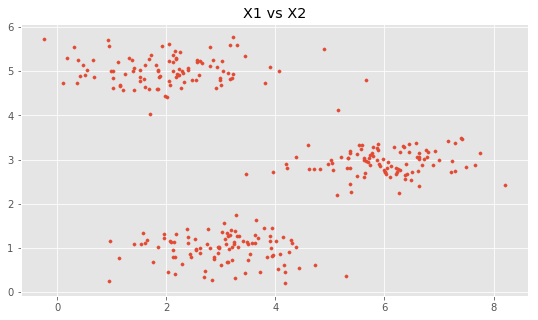

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)

plt.scatter(x[:,0], x[:,1],s=10)
plt.title('X1 vs X2')
plt.show()

# using sklearn Library

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'X1 vs X2')

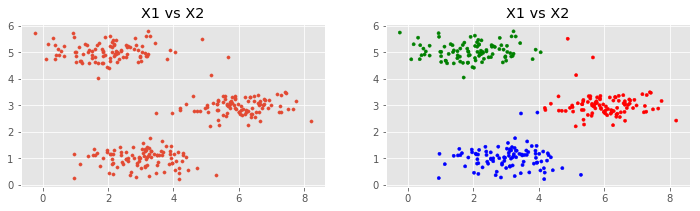

In [6]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])

pred_Y = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x[:,0], x[:,1],s=10)
plt.title('X1 vs X2')
plt.subplot(1, 2, 2)
plt.scatter(x[:,0], x[:,1],c=colors[pred_Y],s=10)
plt.title('X1 vs X2')

# Building KMeans from Scratch


In [0]:
points = np.vstack(x)

In [0]:
def init_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    d = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(d, axis=0)

## 1st iteration

In [16]:
c = init_centroids(points,3)
new_min= closest_centroid(points, c)
# prints which point is nearest to which centroid
print(c, new_min)

[[3.00708934 4.67897758]
 [6.63060699 3.01502301]
 [4.70775773 2.78710869]] [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 2 2 2 2 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1
 1 1 2 1 2 1 2 1 2 2 1 1 2 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1
 1 2 1 0]


In [0]:
c_old = c[:,np.newaxis,:]
c_old_temp = c_old

In [0]:
def new_centroids_each_iter(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

## 2nd Iteration

In [19]:
new_c_1 = new_centroids_each_iter(points, new_min, c_old)
new_min_1 = closest_centroid(points, new_c_1)
new_c_1, new_min_1

(array([[1.97347434, 4.99174242],
        [6.44642229, 2.99064414],
        [3.55764034, 1.46660754]]),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        

## 3rd Iteration

In [20]:
new_c_2 = new_centroids_each_iter(points, new_min_1, new_c_1)
new_min_2 = closest_centroid(points, new_c_2)
new_c_2, new_min_2

(array([[1.95399466, 5.02557006],
        [6.10400126, 3.00515743],
        [3.0928026 , 1.08612509]]),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        

LOOP to find the optimal centroids

In [0]:
for i in range(10):
    new_loop_c = new_centroids_each_iter(points, new_min, c_old)
    new_loop_min = closest_centroid(points, new_c_2)
#     print(new_loop_c , new_loop_min)
    if np.array_equal(new_loop_c, c_old):
        break;
    else:
        c_old, new_min = new_loop_c, new_loop_min

In [22]:
# NEW centroids
new_loop_c

array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

## Plot Cluster points

Text(0.5, 1.0, 'New centroids')

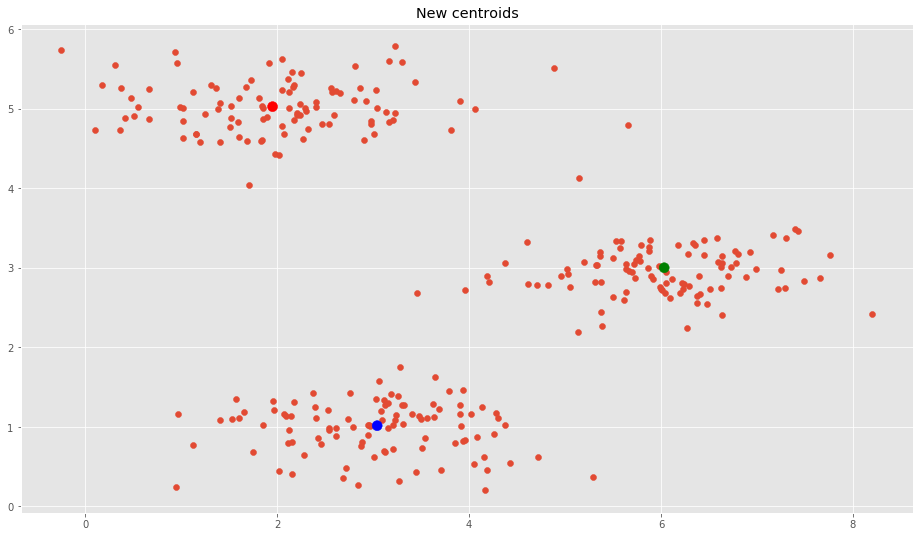

In [27]:
plt.scatter(points[:, 0], points[:, 1])
c = new_loop_c
plt.scatter(c[:, 0], c[:, 1], c=['r','g','b'], s=100)
plt.title('New centroids')

## Finding optimal K using elbow method
### using KElbowVisualizer
### Syntax:


```
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
```




In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

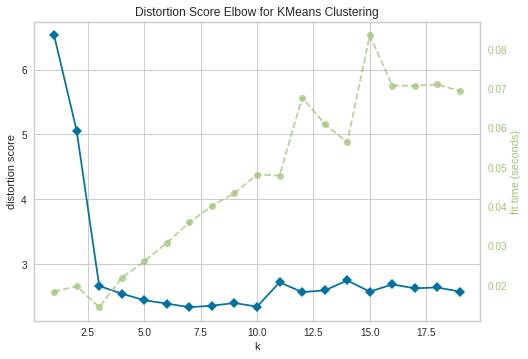

In [30]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Working on scatter dataset

Dataset link: 

In [31]:
path = '/content/'
df_2 = pd.read_excel(path+'ex2data2-logistic.xls')
df_2 = df_2.iloc[:,0:2]
df_2.shape

(118, 2)

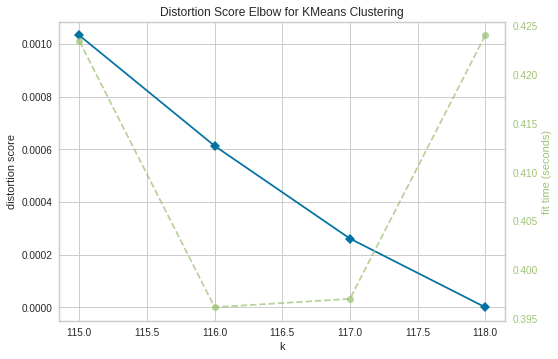

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(115,119))

visualizer.fit(df_2)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [35]:
from sklearn.cluster import KMeans
model_1 = KMeans(n_clusters=5,n_init=3,random_state=0)
model_1.fit(df_2)

# find model centroids i.e cluster centers
model_1.cluster_centers_

array([[ 0.16872883, -0.49005304],
       [ 0.43564   ,  0.66301045],
       [-0.28475373,  0.70954967],
       [-0.4925112 , -0.03786528],
       [ 0.76969222, -0.11382689]])

In [36]:
from sklearn.cluster import KMeans
model_2 = KMeans(n_clusters=6,n_init=100,random_state=1)
model_2.fit(df_2)
model_2.cluster_centers_

array([[-0.09169463,  0.774985  ],
       [ 0.365965  , -0.54813158],
       [-0.36724508, -0.19590585],
       [-0.52636889,  0.48554056],
       [ 0.49515353,  0.67591059],
       [ 0.75832875, -0.01036525]])

Text(0.5, 1.0, 'New centroids')

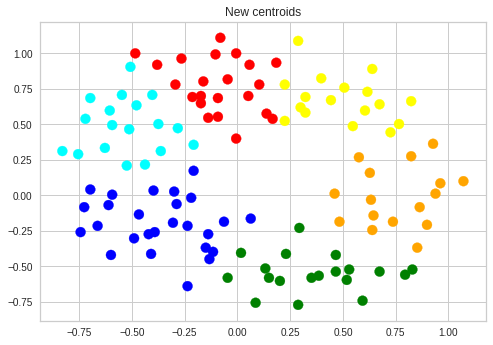

In [38]:
colors = np.array(['red', 'green', 'blue','cyan','yellow','orange'])
pred_Y = np.choose(model_2.labels_, [0, 1, 2,3,4,5]).astype(np.int64)
plt.scatter(df_2['x1'], df_2['x2'],c=colors[pred_Y], s=100)
plt.title('New centroids')

Actual Dataset

Text(0.5, 1.0, 'Dataset')

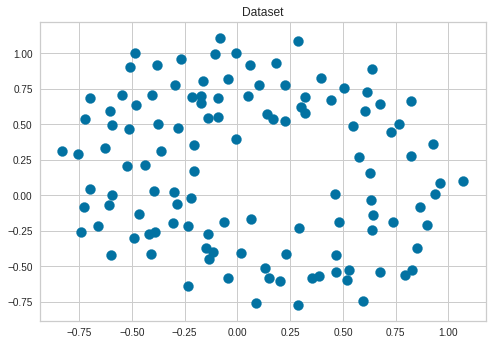

In [39]:
plt.scatter(df_2['x1'], df_2['x2'], s=100)
plt.title('Dataset')